# Rapport Customer personality analysis

## Contexte de l'étude

La base de données fournie comporte des informations sur les clients d'une entreprise. Le but de notre étude est de comprendre les ressemblances entre les clients pour pouvoir les séparer en des populations ayant des comportements, des besoins et des interets homogènes.

A travers la détermination des différentes populations, cette étude permettra à l'entreprise de comprendre ses clients et de modifier ses produits selon la population visée. Grâce à notre analyse cette population visée sera la plus susceptible de consommer le produit.

Au final, cette étude pourra réduire les couts marketing de l'entreprise tout en garantissant l'efficacité de la compagne marketing améliorant ainsi les ventes.

## Analyse des données

In [2]:
from pandas import DataFrame
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time 
import kmeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("marketing_campaign.csv" ,sep='\t' ) #Les variables de notre dataSet sont séparables par des tabulations
data_columns = list(df.columns)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

Notre base de données comporte 2240 lignes représentant les clients et 29 colonnes représentant leurs caractéristiques.

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


En faisant le describe sur le dataSet, on observe que l'écart type des colonnes 'Z_Revenue' et 'Z_CostContact' est nul. Nous pensons que ces valeurs ne changent pas en fonction des clients. On regarde les valeurs que puissent prendre ces variables pour vérifier notre hypothèse.

In [7]:
df['Z_CostContact'].value_counts()

3 2240
Name: Z_CostContact, dtype: int64

In [8]:
df['Z_Revenue'].value_counts()

11 2240
Name: Z_Revenue, dtype: int64

Grâce à la fonction value_counts, on observe que les variables 'z_costContact' et 'Z_Revenue' comportent qu'une seule valeur par variable. On déduit ainsi que ces variables ne constituent pas des éléments différenciant pour notre population.

On élimine ces deux variables pour accélérer notre analyse.

In [9]:
df = df.drop('Z_Revenue', axis = 1)
df = df.drop('Z_CostContact', axis = 1)

<Axes: >

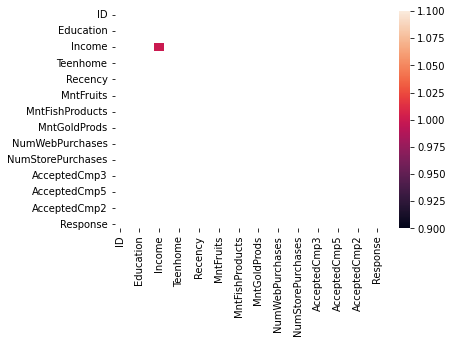

In [10]:
sns.heatmap(df.isna().corr())

In [11]:
df.isna().sum()

ID 0
Year_Birth 0
Education 0
Marital_Status 0
Income 24
Kidhome 0
Teenhome 0
Dt_Customer 0
Recency 0
MntWines 0
MntFruits 0
MntMeatProducts 0
MntFishProducts 0
MntSweetProducts 0
MntGoldProds 0
NumDealsPurchases 0
NumWebPurchases 0
NumCatalogPurchases 0
NumStorePurchases 0
NumWebVisitsMonth 0
AcceptedCmp3 0
AcceptedCmp4 0
AcceptedCmp5 0
AcceptedCmp1 0
AcceptedCmp2 0
Complain 0
Response 0
dtype: int64

In [12]:
median_value = df['Income'].median()
df['Income'].fillna(median_value, inplace=True)

On vérifie si on a des données manquantes de notre dataSet. Grâce à la heatMap, on peut voir qu'on a 24 valeurs manquantes dans la variable 'income'.

D'après la description déjà obtenue du dataSet, la variable 'Income' comporte un écart-type important et des valeurs extrèmes. A cause de cette raison on a choisie d'utiliser la médiane pour remplacer les éléments manquants.

On observe pas des valeurs témoignant d'un manque d'informations sur les autres variable (La présence de 0 dans certaines variables est logique).

In [13]:

df['Dt_Customer_Years']=df['Dt_Customer'].str[-4:]

df['Dt_Customer_Years'] = 2023 - df['Dt_Customer_Years'].astype(int)
df = df.drop('Dt_Customer', axis = 1)

Nous avons créé une nouvelle colonne appelée "Dt_Customer_Years" pour des analyses ultérieures en extrayant les quatre derniers caractères de chaque chaîne de la colonne "Dt_Customer". Ensuite, nous avons calculé la différence entre l'année 2023 et les valeurs de la colonne "Dt_Customer_Years".

In [14]:
#Add Age columns and delete Year_birth columns
df['Age'] = 2023 - df['Year_Birth'].astype(int)

df = df.drop('Year_Birth', axis = 1)

.Pour simplifier le DataFrame,nous avons calculé l'âge en soustrayant l'année de naissance de 2023, puis nous l'avons ajouté dans une nouvelle colonne 'Age' et puis nous avons supprimé la colonne 'Year_Birth'.

.Pour voir les modifications qu'on a fait, on affiche les premieres lignes de dataFrame par df.head

In [15]:
df.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Years,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,11,66
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,9,69
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,10,58
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,9,39
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,9,42


In [16]:
#df['Education'].value_counts()
df['Marital_Status'].value_counts()

Married 864
Together 580
Single 480
Divorced 232
Widow 77
Alone 3
Absurd 2
YOLO 2
Name: Marital_Status, dtype: int64

Il semble que la majorité des personnes dans nos données soient mariées, vivent en couple ou sont célibataires.

In [17]:
#Drop Column ID 
df = df.drop('ID' ,axis = 1)

In [18]:
# Création d'un dictionnaire de mappage des états matrimoniaux
label_Marital_Status = {
    'Single': 0,
    'Together': 1,
    'Married': 2,
    'Divorced': 3,
    'Widow': 4,
    'Alone': 5,
    'Absurd': 6,
    'YOLO': 7
}

# Utilisation de la méthode map pour appliquer le mappage à la colonne 'Marital_Status' de DataFrame df
df['Marital_Status'] = df['Marital_Status'].map(label_Marital_Status)

In [19]:
label_Education = {'Graduation': 1, 'PhD': 4, 'Master': 3 , '2n Cycle': 2,'Basic': 0}
df['Education'] = df['Education'].map(label_Education)

Pour faliciter l'analyse de PCA et Clustering, on a remplacer les valeurs textuelles de 'Marital_Status' et 'Education' par des valeurs numeriques. 

In [20]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Years,Age
0,1,0,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,11,66
1,1,0,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,9,69
2,1,1,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,10,58
3,1,1,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,9,39
4,4,2,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,9,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,2,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,0,10,56
2236,4,1,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,0,9,77
2237,1,3,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,0,9,42
2238,3,1,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,0,9,67


Pour effectuer le clustering, il est difficile de créer un graphique de dispersion en 2D en raison du grand nombre de dimensions. C'est pour cela, nous avons utilisé des techniques de réduction de la dimensionnalité telles que la PCA.

## Clustering avec ACP

In [21]:
#On standardise les données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_std=False)
df_copy = df.copy()
df_standerdised = pd.DataFrame(scaler.fit_transform(df_copy))

#On vérifie que la sandardisation a fonctionné 
df_standerdised.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2240.000000,2240.000000,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,...,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03,2.240000e+03
mean,1.459150e-16,-1.586033e-18,-1.585119e-12,-7.930164e-18,0.000000,0.000000,-2.598556e-14,-2.486900e-15,-2.842171e-15,1.421085e-15,...,-1.332268e-16,-8.921435e-18,-5.947623e-18,-8.723181e-18,6.542386e-18,5.947623e-18,-1.486906e-19,-9.516197e-18,-7.105427e-16,-2.030122e-15
std,1.277120e+00,1.073864e+00,2.503796e+04,5.383981e-01,0.544538,28.962453,3.365974e+02,3.977343e+01,2.257154e+02,5.462898e+01,...,2.426645e+00,2.598131e-01,2.627283e-01,2.598131e-01,2.453160e-01,1.149756e-01,9.639117e-02,3.562736e-01,6.845543e-01,1.198407e+01
min,-2.047768e+00,-1.496875e+00,-5.050798e+04,-4.441964e-01,-0.506250,-49.109375,-3.039357e+02,-2.630223e+01,-1.669500e+02,-3.752545e+01,...,-5.316518e+00,-7.276786e-02,-7.455357e-02,-7.276786e-02,-6.428571e-02,-1.339286e-02,-9.375000e-03,-1.491071e-01,-9.718750e-01,-2.719420e+01
25%,-1.047768e+00,-4.968750e-01,-1.669923e+04,-4.441964e-01,-0.506250,-25.109375,-2.801857e+02,-2.530223e+01,-1.509500e+02,-3.452545e+01,...,-2.316518e+00,-7.276786e-02,-7.455357e-02,-7.276786e-02,-6.428571e-02,-1.339286e-02,-9.375000e-03,-1.491071e-01,2.812500e-02,-8.194196e+00
50%,-1.047768e+00,5.031250e-01,-8.564754e+02,-4.441964e-01,-0.506250,-0.109375,-1.304357e+02,-1.830223e+01,-9.995000e+01,-2.552545e+01,...,6.834821e-01,-7.276786e-02,-7.455357e-02,-7.276786e-02,-6.428571e-02,-1.339286e-02,-9.375000e-03,-1.491071e-01,2.812500e-02,-1.194196e+00
75%,9.522321e-01,5.031250e-01,1.605177e+04,5.558036e-01,0.493750,24.890625,2.003143e+02,6.697768e+00,6.505000e+01,1.247455e+01,...,1.683482e+00,-7.276786e-02,-7.455357e-02,-7.276786e-02,-6.428571e-02,-1.339286e-02,-9.375000e-03,-1.491071e-01,2.812500e-02,9.805804e+00
max,1.952232e+00,5.503125e+00,6.144280e+05,1.555804e+00,1.493750,49.890625,1.189064e+03,1.726978e+02,1.558050e+03,2.214746e+02,...,1.468348e+01,9.272321e-01,9.254464e-01,9.272321e-01,9.357143e-01,9.866071e-01,9.906250e-01,8.508929e-01,1.028125e+00,7.580580e+01


In [22]:
#On commence par faire une ACP sur nos données 
from sklearn.decomposition import PCA                   # for Principal Component Analysis
pca = PCA() 
pca.fit(df_standerdised)
components_df = pca.components_
projection_df = pd.DataFrame(pca.transform(df_standerdised))
projection_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,5904.547476,-399.183824,243.872980,-77.964972,-45.983440,-18.961626,-11.386548,0.223693,12.634162,0.811724,...,-0.358847,0.196990,0.184466,0.168856,-0.042302,-0.550657,0.086423,-0.003032,-0.000336,-0.020229
1,-5896.916440,280.686213,-40.315330,25.550238,-3.964472,-4.575145,9.291902,1.484024,15.484747,-2.662879,...,0.650518,-0.112944,-0.377907,0.007013,0.025741,-0.069017,-0.022777,0.010675,0.000003,-0.022580
2,19374.975409,73.393993,-115.407795,-42.398079,-45.797510,-43.052792,17.309850,-12.768828,1.378653,2.871834,...,-0.192503,0.460234,0.272197,-0.244438,-0.131070,-0.022416,0.004248,0.019039,0.011826,-0.016718
3,-25593.952192,94.676070,19.141880,13.690200,-12.311439,-6.158914,22.015726,3.146788,-12.618288,-0.334515,...,0.826635,0.294709,0.001145,-0.133366,0.021358,-0.056679,-0.013728,-0.000599,0.000969,-0.008722
4,6053.481418,195.198641,-11.253952,-1.982606,-29.232593,9.892809,-42.263168,-21.194207,-12.414953,2.914468,...,0.895046,0.688103,0.148536,-0.135699,0.018077,-0.048786,-0.002728,0.013498,0.019632,-0.000628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,8988.059438,-315.451980,-136.386247,-146.186373,120.589734,57.298413,7.511218,46.582618,-0.293544,-3.050801,...,0.243617,-0.571356,-0.154419,-0.464785,-0.007689,-0.230866,0.031691,-0.106183,0.006117,0.014032
2236,11775.479183,65.329372,-198.471416,50.388769,-4.859247,-4.718213,-8.748571,-1.402655,20.024891,4.413112,...,1.167711,1.063378,-0.891097,0.000405,0.239110,0.410291,-0.616675,-0.545665,-0.000184,-0.013003
2237,4747.742473,-537.382788,-178.333262,43.695219,-21.639135,6.572755,-35.935278,-33.624245,-15.727343,-0.798526,...,1.340591,0.078341,0.400875,-0.028601,0.262426,-0.106468,0.615121,-0.205884,-0.155254,0.006325
2238,17007.527911,20.733281,-34.047466,-20.025903,-8.319208,-30.811093,35.319272,9.354203,11.363923,1.427640,...,0.776654,-0.304523,-0.114979,-0.113053,-0.031644,-0.073927,-0.011076,0.039244,0.001335,-0.005861


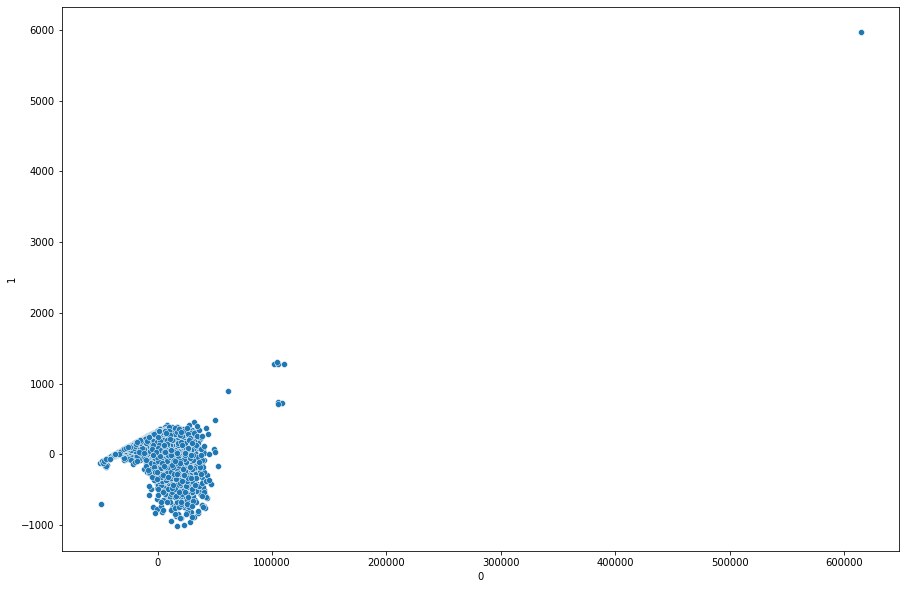

In [23]:
# Créer une figure pour le graphique avec une taille de 15 pouces de largeur et 10 pouces de hauteur
plt.figure(figsize=(15, 10))
# Tracer un nuage de points en utilisant Seaborn (sns)
# La fonction scatterplot() trace un nuage de points avec les données de la colonne 0 en abscisse (x=0) 
# et les données de la colonne 1 en ordonnée (y=1) à partir du DataFrame projection_df
sns.scatterplot(x=0, y=1, data=projection_df.iloc[:,0:2])
# Afficher le graphique
plt.show()

In [24]:
# Étape 5 : Ratios de variance expliquée
# Calculer les ratios de variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Afficher les ratios de variance expliquée
print("Ratios de variance expliquée :")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Composante {i + 1}: {ratio:.4f}")

Ratios de variance expliquée :
Composante 1: 0.9998
Composante 2: 0.0001
Composante 3: 0.0000
Composante 4: 0.0000
Composante 5: 0.0000
Composante 6: 0.0000
Composante 7: 0.0000
Composante 8: 0.0000
Composante 9: 0.0000
Composante 10: 0.0000
Composante 11: 0.0000
Composante 12: 0.0000
Composante 13: 0.0000
Composante 14: 0.0000
Composante 15: 0.0000
Composante 16: 0.0000
Composante 17: 0.0000
Composante 18: 0.0000
Composante 19: 0.0000
Composante 20: 0.0000
Composante 21: 0.0000
Composante 22: 0.0000
Composante 23: 0.0000
Composante 24: 0.0000
Composante 25: 0.0000
Composante 26: 0.0000


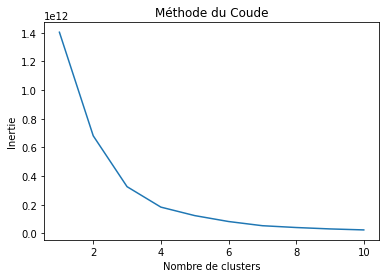

In [25]:
# Initialiser une liste pour stocker la somme des carrés des distances intra-cluster (WCSS)
wcss = []

# Itérer sur un certain nombre de clusters (de 1 à 10 dans cet exemple)
for i in range(1, 11):
    # Créer une instance de KMeans avec les paramètres spécifiés
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Appliquer l'algorithme K-Means aux données dans le dataframe 'df'
    kmeans.fit(projection_df)

    # Ajouter la valeur de l'inertie (WCSS) à la liste
    wcss.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # L'axe des x représente le nombre de clusters
plt.ylabel('Inertie')  # L'axe des y représente l'inertie (Somme des carrés des distances intra-cluster)
plt.show()  # Afficher le graphique

In [26]:
# Effectuer un regroupement (clustering) sur les données projetées en PCA
from sklearn.cluster import KMeans

# Sélectionner les deux premières composantes principales pour le clustering
clustering_pca_df = projection_df.iloc[:, 0:2]

# Créer une instance du modèle K-Means avec 4 clusters, 10 initialisations, et une graine aléatoire de 0
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)

# Appliquer le modèle K-Means aux données
kmeans.fit(clustering_pca_df)

# Ajouter une colonne "target" au DataFrame pour indiquer les clusters attribués à chaque échantillon
clustering_pca_df["target"] = kmeans.labels_

# Afficher le DataFrame résultant avec les clusters attribués
clustering_pca_df

<ipython-input-26-6eed86cd1ba8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_pca_df["target"] = kmeans.labels_


,0,1,target
0,5904.547476,-399.183824,0
1,-5896.916440,280.686213,1
2,19374.975409,73.393993,0
3,-25593.952192,94.676070,1
4,6053.481418,195.198641,0
...,...,...,...
2235,8988.059438,-315.451980,0
2236,11775.479183,65.329372,0
2237,4747.742473,-537.382788,0
2238,17007.527911,20.733281,0


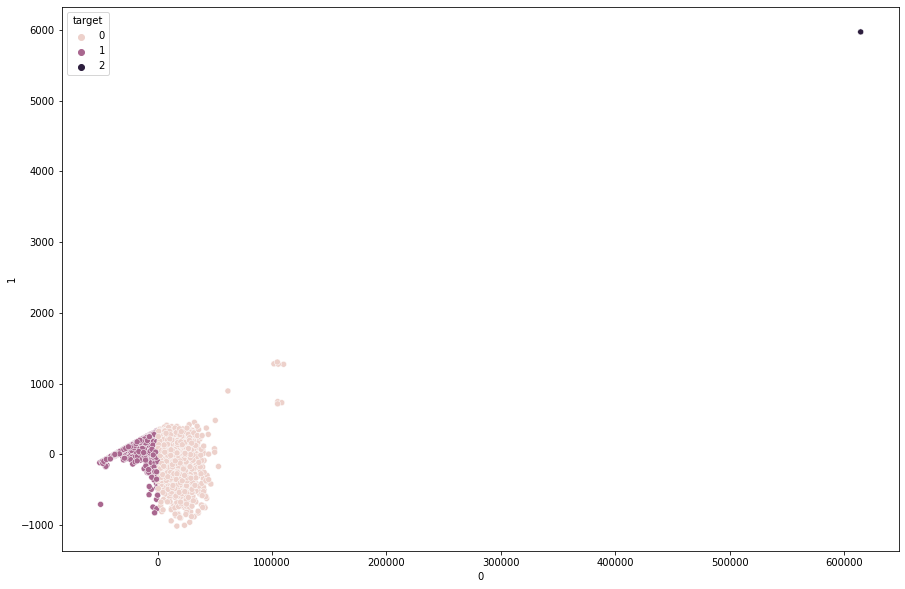

In [27]:
# Créer une figure pour le graphique avec une taille personnalisée de 15x10 pouces
plt.figure(figsize=(15, 10))

# Tracer un nuage de points (scatter plot) en utilisant Seaborn (sns)
# Les valeurs x correspondent à la colonne 0 de votre DataFrame
# Les valeurs y correspondent à la colonne 1 de votre DataFrame
# Les données sont extraites du DataFrame clustering_pca_df
# La couleur des points est déterminée par la colonne 'target' du DataFrame
sns.scatterplot(x=0, y=1, data=clustering_pca_df, hue=clustering_pca_df['target'])

# Afficher le graphique
plt.show()

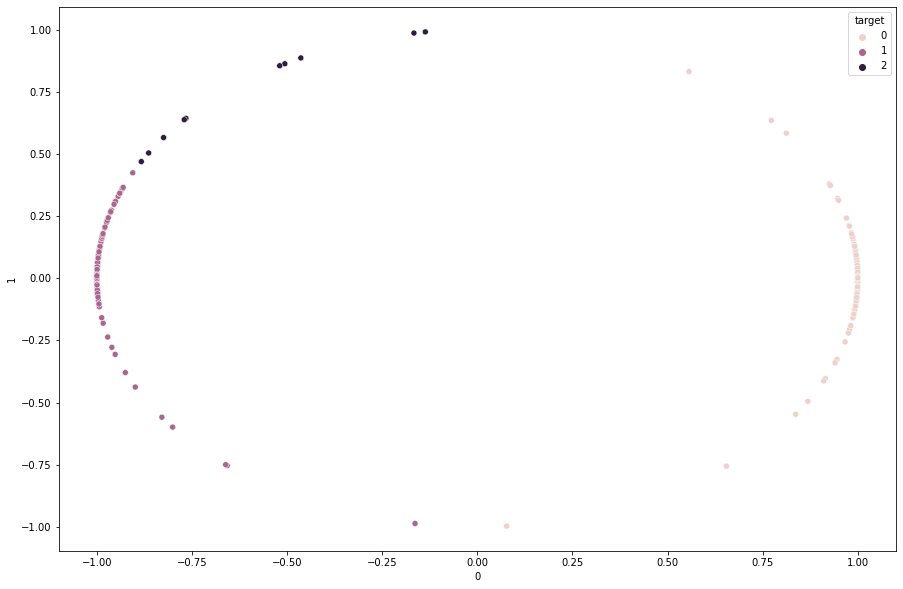

In [28]:
# Regroupement après normalisation
from sklearn.preprocessing import Normalizer

# Copie des données de projection pour effectuer le regroupement
projection_df_copy = clustering_pca_df.copy()
projection_df_copy = projection_df_copy.drop("target", axis=1)

# Normalisation des données
projection_df_copy = Normalizer().fit_transform(projection_df_copy)
projection_df_copy = pd.DataFrame(projection_df_copy)

# Application de l'algorithme K-Means avec 4 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(projection_df_copy)

# Affectation des labels de clusters aux données de projection
projection_df_copy["target"] = kmeans.labels_

# Affichage d'un graphique de dispersion
plt.figure(figsize=(15, 10))
sns.scatterplot(x=0, y=1, data=projection_df_copy, hue=projection_df_copy['target'])
plt.show()

## Clustering

**1/Methode de K-MEANS clustering**

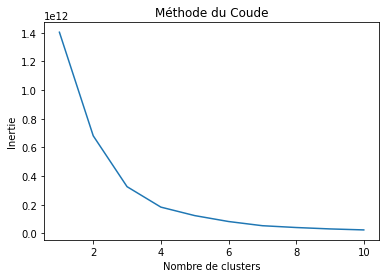

In [29]:

# Initialiser une liste pour stocker la somme des carrés des distances intra-cluster (WCSS)
wcss = []

# Itérer sur un certain nombre de clusters (de 1 à 10 dans cet exemple)
for i in range(1, 11):
    # Créer une instance de KMeans avec les paramètres spécifiés
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Appliquer l'algorithme K-Means aux données dans le dataframe 'df'
    kmeans.fit(df)

    # Ajouter la valeur de l'inertie (WCSS) à la liste
    wcss.append(kmeans.inertia_)

# Tracer le graphique de la méthode du coude
plt.plot(range(1, 11), wcss)
plt.title('Méthode du Coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # L'axe des x représente le nombre de clusters
plt.ylabel('Inertie')  # L'axe des y représente l'inertie (Somme des carrés des distances intra-cluster)
plt.show()  # Afficher le graphique

. On a utilisé la méthode du coude pour déterminer le nombre optimal de clusters (k=3).

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-30-dbdc5fc3a079>:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], s=50, alpha=0.5)


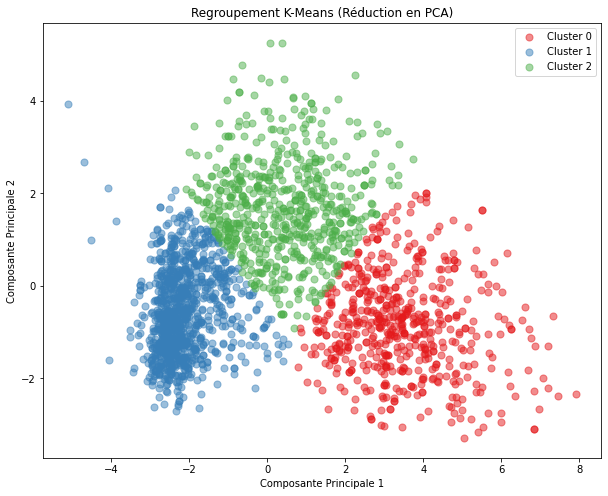

In [30]:

# Sélection des caractéristiques pertinentes du dataframe 
selected_features = df[['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumDealsPurchases', 'MntSweetProducts', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntWines', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Dt_Customer_Years', 'Age']]

# Normalisation des données
scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_features)

# Analyse en Composantes Principales (PCA)
pca = PCA(n_components=2)  # Réduction à 2 composantes principales
principal_components = pca.fit_transform(normalized_data)

# Création d'un dataframe pour la projection des données en ACP
projection_pca  = pd.DataFrame(pca.transform(normalized_data))

# Clustering K-Means
k = 3  # basé sur la méthode du coude
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(projection_pca)

# Ajout d'une nouvelle colonne 'Cluster' au dataframe pour indiquer l'appartenance au cluster
df['Cluster'] = kmeans.labels_

# Création d'un graphique de dispersion pour visualiser les clusters
plt.figure(figsize=(10, 8))

# Attribution d'une couleur à chaque cluster
colors = sns.color_palette("Set1")

for cluster_id in range(k):
    cluster_data = principal_components[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], s=50, alpha=0.5)

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Regroupement K-Means (Réduction en PCA)')
plt.legend()
plt.show()

La partie de la normalisation est essentielle pour effectuer le clustering.

On a fait ensuite la pca pour reduire la dimension de nos données. Ceci est necessaire pourqu'on puisse visionner les clusters en fonction des caracteristiques en 2D. 

Dans le graphique, chaque point représente un point de données , nous pouvons voir que les points sont regroupés en 3 clusters distincts. Cela signifie que les données ont été divisées en trois groupes clairement définis.






In [31]:
## Ajout du cercle de corrélation

# Obtenir les composantes principales de l'ACP
all_principal_components = pca.components_

# Obtenir les ratios de variance expliquée
explained_variance = pca.explained_variance_ratio_

# Afficher les ratios de variance expliquée
explained_variance

array([0.24956582, 0.08489673])

Ces ratios indiquent la proportion de la variance totale des données qui est expliquée par chaque composante principale. On peut voir que les données conservées représentent environ 31% de l'ensemble des données, cependant, il est important de noter que cela ne signifie pas nécessairement que des données ont été éliminées ou perdues.

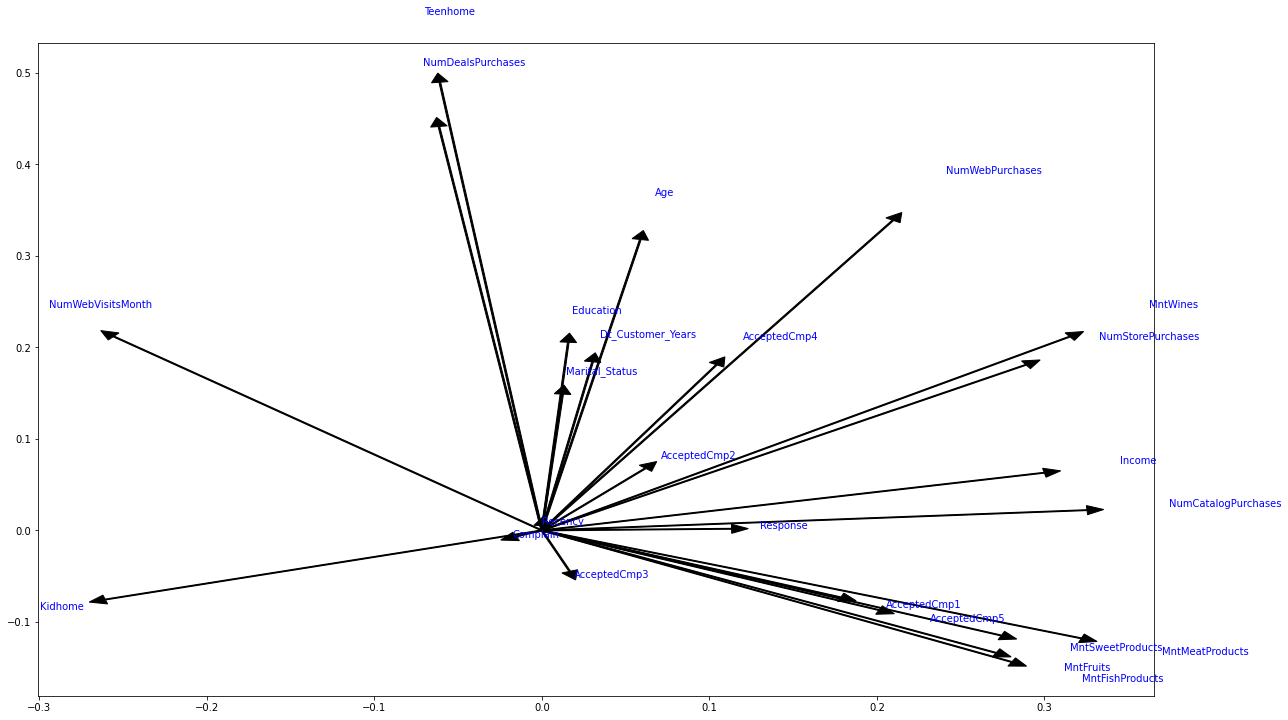

In [32]:
# Nombre de variables dans les données normalisées
n_variables = normalized_data.shape[1]

# Création d'une figure et d'un axe pour le graphique
fig, ax = plt.subplots(figsize=(20, 12))

# Boucle à travers les variables
for i in range(n_variables):
    # Tracé d'une flèche à partir de l'origine (0, 0) vers les composantes principales
    ax.arrow(0, 0, all_principal_components[0, i], all_principal_components[1, i], head_width=0.01, head_length=0.01, fc='black', ec='black')
    
    # Ajout d'une étiquette avec le nom de la variable à proximité de la flèche
    ax.text(all_principal_components[0, i] * 1.15, all_principal_components[1, i] * 1.15, pd.DataFrame(selected_features).columns[i], color='b')

# Affichage du graphique
plt.show()

<ipython-input-33-23a7d5da3cdc>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], s=50, alpha=0.5)


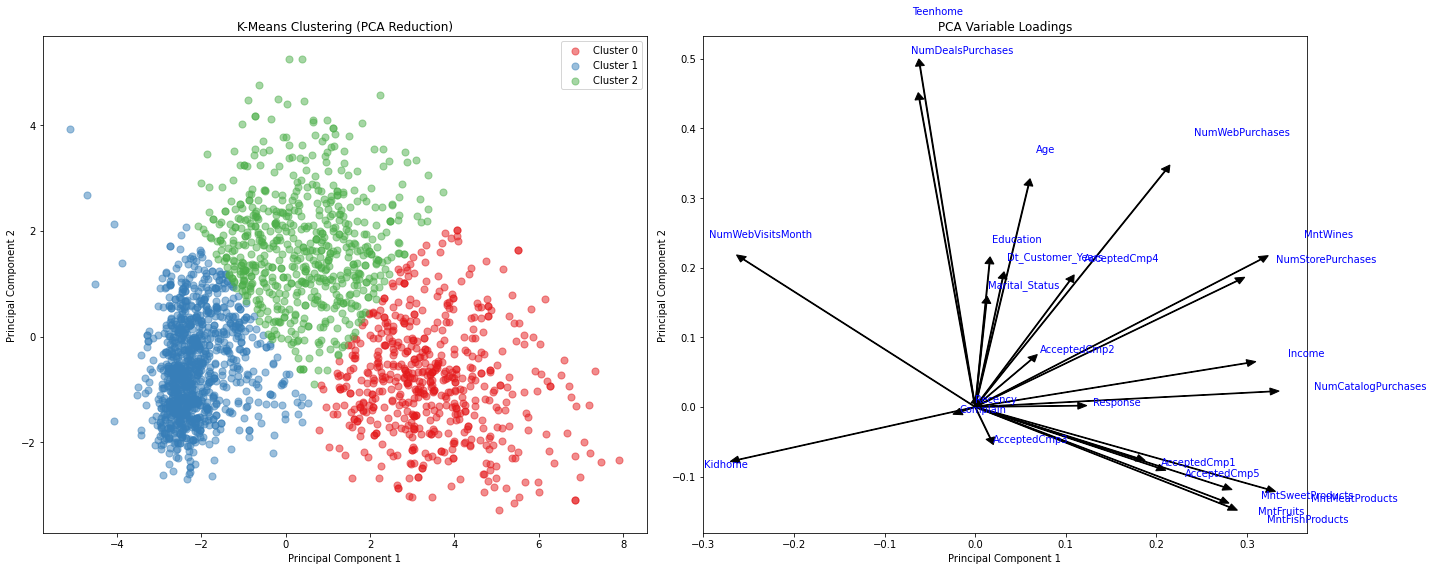

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code for data preparation, PCA, and K-Means clustering)

# Create a new figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot K-Means clustering on the first subplot
for cluster_id in range(k):
    cluster_data = principal_components[df['Cluster'] == cluster_id]
    axes[0].scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', c=colors[cluster_id], s=50, alpha=0.5)

axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].set_title('K-Means Clustering (PCA Reduction)')
axes[0].legend()

# Plot PCA variable loadings on the second subplot
n_variables = normalized_data.shape[1]

for i in range(n_variables):
    axes[1].arrow(0, 0, all_principal_components[0, i], all_principal_components[1, i], head_width=0.01, head_length=0.01, fc='black', ec='black')
    axes[1].text(all_principal_components[0, i] * 1.15, all_principal_components[1, i] * 1.15, pd.DataFrame(selected_features).columns[i], color='b')

axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('PCA Variable Loadings')

# Adjust spacing between the two subplots
plt.tight_layout()

# Display the combined figure
plt.show()

**Selon la PCA on peut dire que la population est divisée en 3 types:**

**En bleu:** Une population a famille nombreuse jeune qui ne fait pas beaucoup d'achats et qui gagne moins par personne dans la maison (Ce qui explique la corrélation négative avec le nombre d'enfant).

**En rouge:** Une population de classe moyenne qui est connecté depuis longtemps au site et qui cherchent les discounts.

**En vert:** Une population riche qui tend à faire beaucoup d'achats

le cercle de correlation a identifier les caracteristiques importantes.
- Chaque fleche correspond a une caracteristique , et son angle et sa longueur par rapport a une composante principale indiquent a quel point cette caracteristique contribue a cette composante.
- la fleche 'Income' par exemple, on voit qu'elle pointe loin de l origine vers une composante principale(axe X) , cela signifie que cette caracteristique est fortement correlee a cette composante et nous pourrons dire qu'elle est importante a la formation du cluster.




In [34]:
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Customer_Years,Age,Cluster
0,1,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,1,11,66,0
1,1,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,0,9,69,1
2,1,1,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,0,10,58,0
3,1,1,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,0,9,39,1
4,4,2,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,0,9,42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,2,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,0,10,56,2
2236,4,1,64014.0,2,1,56,406,0,30,0,...,0,0,0,1,0,0,0,9,77,2
2237,1,3,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,0,9,42,2
2238,3,1,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,0,9,67,2


In [35]:
variables_to_average = ['Income', 'Teenhome', 'Kidhome','NumDealsPurchases', 'MntSweetProducts', 'MntFruits', 'MntFishProducts', 'MntMeatProducts', 'MntWines', 'Age', 'Dt_Customer_Years']

cluster_means = df.groupby('Cluster')[variables_to_average].mean()

print(cluster_means)

               Income  Teenhome   Kidhome  NumDealsPurchases  \
Cluster                                                        
0        77104.492995  0.155867  0.045534           1.309982   
1        35034.184236  0.429400  0.799807           2.046422   
2        57891.422047  0.946457  0.223622           3.691339   

         MntSweetProducts  MntFruits  MntFishProducts  MntMeatProducts  \
Cluster                                                                  
0               71.274956  69.231173       100.903678       459.730298   
1                5.449710   5.520309         7.839458        25.075435   
2               22.500787  21.540157        28.874016       134.699213   

           MntWines        Age  Dt_Customer_Years  
Cluster                                            
0        599.164623  54.378284           9.970228  
1         41.806576  50.884913           9.864603  
2        465.299213  59.417323          10.148031  


À partir de cette analyse, on peut observer que la classe verte dans le graphique représente la population aisée, caractérisée par un taux de consommation de produits plus élevé. De plus, on remarque que le nombre d'enfants par foyer est faible.

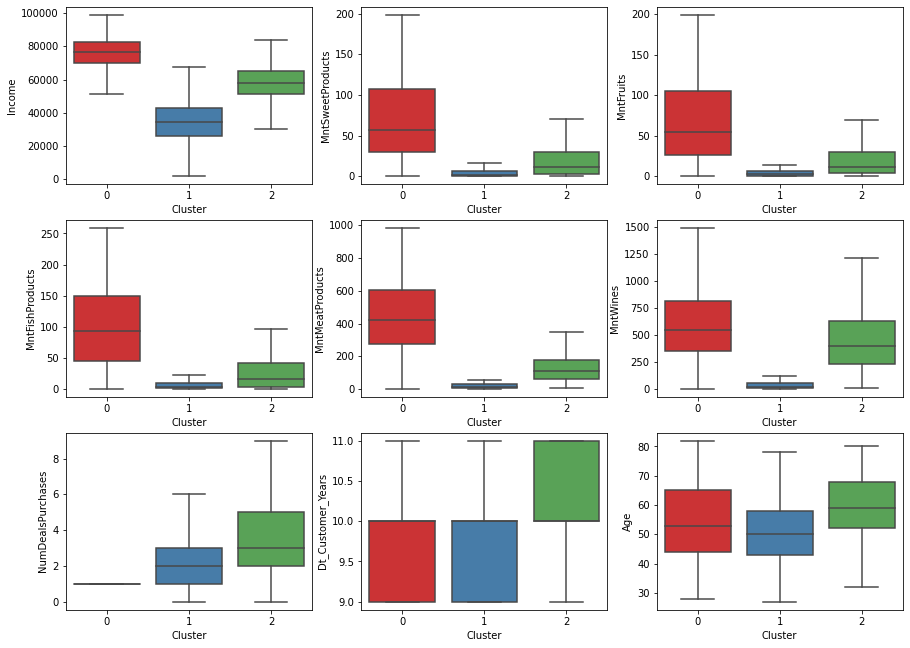

In [36]:
# Utility function to simplify syntax later on



# Define a color palette with colors for each cluster
cluster_colors = sns.color_palette("Set1", n_colors=k)  # 'k' is the number of clusters

def boxplot(y):
    # Use the cluster_colors in the box plot
    sns.boxplot(x="Cluster", y=y, data=df, showfliers=False, palette=cluster_colors)

# Call the function with the variable you want to create the box plot for



# We define a figure where we will be adding our graphs
plt.figure(figsize=(15,15))

# And then add the plots to the grid on specific positions
plt.subplot(431) #221: 2 nombre de ligne, 2 colonnes, 1er graphe
boxplot('Income')

plt.subplot(432)
boxplot('MntSweetProducts')

plt.subplot(433)
boxplot('MntFruits')

plt.subplot(434)
boxplot('MntFishProducts')

plt.subplot(435)
boxplot('MntMeatProducts')

plt.subplot(436)
boxplot('MntWines')

plt.subplot(437)
boxplot('NumDealsPurchases')

plt.subplot(439)
boxplot('Age')

plt.subplot(4,3,8)
boxplot('Dt_Customer_Years')

plt.show()

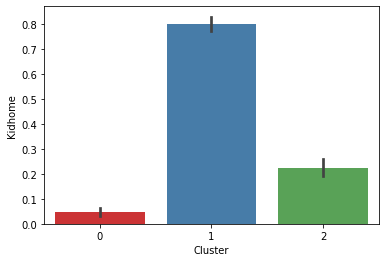

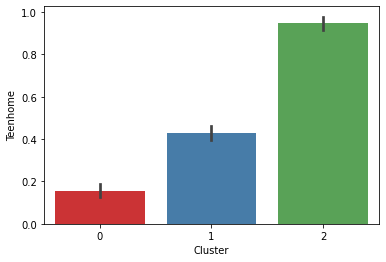

In [37]:
sns.barplot(x="Cluster", y='Kidhome', data=df ,palette=cluster_colors )
plt.show()
sns.barplot(x="Cluster", y='Teenhome', data=df ,palette=cluster_colors)

plt.show()

**Conclusion**

- Séparation de la clientèle en 3 populations.
- Des caractéristiques personnelles différents.
- Des comportements d’achats différents.
- Détermination d’une population très consommatrice 


